### Introduction into Data Science 
#### Assignement 1

1) Download a clustering dataset from the UCI Machine Learning Repository

2) Cluster the dataset using
- Agglomerative clustering
- k-means method
- DBSCAN method

3) Justify the choice of the values for the hyper-parameters (similarity, linkage, k, delta, epsilon, ...)

## Theoretical Part

<b>Какую задачу решает кластреный анализ?</b>
 - Кластерный анализ разбивает наши обьекты (строки) на группы (заранее мы не знаем сколько группы и какие они должны быть) --> группы которые мы получаем будет называться кластерами. 
  
<b>Какие типы кластеров бывают?</b>
 - Выраженные кластеры (все равно какой метод использовать)(метод ориентирован на плотные сгустки)
 - Ленточные кластеры (метод ближайшего соседа помогает)
 - Плотные шаровые скопления (метод Варда и метод среднего взвешенного)

<b>Методы кластеризации</b>

1) Метод k - средних<br>
2) Иерархический кластерный анализ<br>
<b>Чем Иерархический Кластреный анализ плох?</b>
В памяти необходимо хранить матрицу попарных расстояний<br>
3) Самоорганизуещиеся карты Коханена (SOM)<br>
4) Смесь (нормальных) распределений<br>

<b>Иерархический Кластерный анализ - идея метода</b>
Мы сводим задачу к геометрической
 - Каждому обьекту (каждой строке в таблице) ставится в соответсвие точка в пространстве (k - мерном пространстве)
 
<b>После сведения задчи к геометрической мы получаем следующее:</b> 
 - Каждый обьект - точка; 
 - Похожие обьекты расположены близко друг к другу; 
 - Различные обьекты расположены далеко друг от друга; 
 - Скопления точек - Ккластер; 
 
  <b>В каких моментах мы учавствуем?</b>
  - Отбор переменных
  - Метод стандартизации
  - Расстояние между кластерами
  - Расстояние между обьектами
  
<b>Отбор переменных</b>  
 - Очень важный момент!

<b>Методы стандартизации</b>  
 - Максимальное значени 1, минимальное 0(-1) $\dfrac{x_i - min}{max - min}$
 -  <b>z-метки</b> Среднее равно 0, выборочная дисперсия равна 1 (линейное преобразование) $\dfrac{x_i - mean_x}{{\sqrt{1/n * \sum{x_i - mean_x}}ˆ2}}$
 
<b>Важная характеристика --> расстояние между обьектами</b>
 - Евклидово расстояние
 - Квадрат Евклидова расстояния
 - Блок (Манхеттоновское расстояние)
 - Хэмминга
 - Минковского 
  
<b>Важная характеристика --> расстояние между кластерами</b>
 - Среднее невзвешенное расстояние (Average linkage clustering)(Все расстояния между парами точек и усредняются) 
 - Центроидный метод (Centroid Method) (Практически вышел из упортебления)(дендрограмма может иметь ересечения)
 - Метод дальнего соседа, максимального расстояние (Complete linkage clustering)(в каждом кластере ищем самый дальний элемент и расстояние между этими дальними элементами и будет расстоянием между кластерами)
 - Метод ближайшего соседа (Single linkage clustering)(в каждом кластере ищем самый близкий элемент и расстояние между этими дальними элементами и будет расстоянием между кластерами) 
 - Метод Варда (Ward's method) - (предполагается использование Евклидова расстояния) 
 - Sorencen - Dice - $Q = 2 *  \dfrac{|A \cap B|}{|A| + |B|}$
 

<b>Алгоритм Иерархического Кластерного Анализа</b><br>
1) В начале каждый обьект обьявляется кластером (Если n обьектов, значит n кластеров, в каждом кластере ровно 1 обьект)<br>
 1.1) Выбираем 2 ближайших кластера и обьеденяем их<br>
 1.2) Выбираем 2 ближайших кластера и обьеденяем их<br>
 1.3) Выбираем 2 ближайших кластера и обьеденяем их и т.д. (Идея в том, чтобы в какой то момент остановиться 
 --> остановиться тогда, когда расстояние между обьеденяемыми кластерами стало большое)<br>
2) Как можно обнаружить/подобрать этот момент<br>
 2.1) <b>Дендрограмма</b> --> Правило постороения денжрограммы<br>
  2.1.1) Сначала каждому обьекту сопоставляется точка на прямой<br>
  2.1.2) Каждому кластеру будет соответсвовать вертикальная линия (высота вертикальной линии будет соответсвовать расстоянию между кластерами)<br>
  2.1.3) Каждому обьеденению кластеров будет соответсвовать горизонтальная линия<br>
 2.2) <b>Метод локтя или Каменистая осыпь</b> 

<img src="figure_4.png"><br>
<img src="fig-10-1-1.png">

## Practical Part

<b>Approach Hierarchical Cluster Analysis</b>

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

In [3]:
iris = datasets.load_iris()
feat = iris.feature_names

X = iris.data  
y = iris.target

y_name = iris.target_names

print(y_name, y)

['setosa' 'versicolor' 'virginica'] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Visualisation of Iris Data

In [4]:
# Have a look on a data

#For Hierarchy approach
dataframe = pd.DataFrame(data = np.c_[iris['data']],
                     columns = iris['feature_names'])

#For KMeans approach
df = pd.DataFrame(data = np.c_[iris['data']],
                  columns = iris['feature_names'])

In [5]:
dataframe.shape

(150, 4)

In [12]:
y_name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing

clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(dataframe);

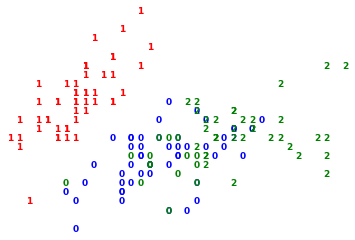

In [15]:
X_plot = preprocessing.MinMaxScaler().fit_transform(X)
colours = 'rbg'
for i in range(dataframe.shape[0]):
    plt.text(X_plot[i, 0], X_plot[i, 1], str(clustering.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

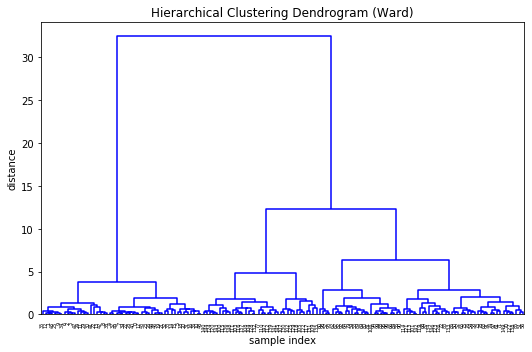

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(dataframe, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

## Hierarchy approach

In [54]:
##Computer Science Approach
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 


#Link - обьект, в котором будет храниться информация о последовательном слиянии
link = linkage(dataframe, 'ward', 'euclidean')



Обьект link представляет собой матрицу (n-1), где n число наблюдений. Каждая строка матрицы представляет собой результат слияния очередной пары кластеров с номерами link[i, 0] и link[i, 1]. Новому кластеру присваивается номер n+1. linl[i, 2] содержит расстояние между обьеденнеными кластерами, а link[i, 3], размер нового кластера. 

In [55]:
link[:5]

array([[1.01e+02, 1.42e+02, 0.00e+00, 2.00e+00],
       [7.00e+00, 3.90e+01, 1.00e-01, 2.00e+00],
       [0.00e+00, 1.70e+01, 1.00e-01, 2.00e+00],
       [9.00e+00, 3.40e+01, 1.00e-01, 2.00e+00],
       [1.28e+02, 1.32e+02, 1.00e-01, 2.00e+00]])

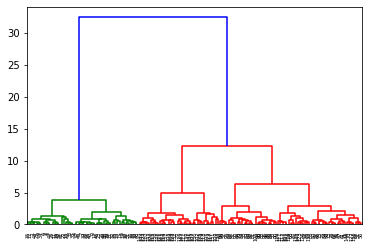

In [56]:
dn = dendrogram(link)

Здесь мы видим, что оптимальное количесвто кластеров - 3, так как дальше идет большая разница в расстояниях. 

<b>Что делаем дальше?</b><br>
Сначала добавим к данным колонку cluster, в которую запишем номер кластера, в который попал обьект. Сдлеаем это с помощью функции fcluster. В качестве первого аргумента передаем linkage. Вторым аргументом передаем либо пороговое значение для расстояния между кластерами, либо количество кластеров, в зависимости от аргумента criterion. Третьим аргументом (criterion) передаем критерий для разбиения на кластеры (distance - для останвки на разбиения по расстоянию между кластерами) или (maxclust - для разбиения по заданному числу кластеров)


In [57]:
#fcluster(linkage, threshold_value/number_of_clusters, criterion(distance or maxclust))

dataframe['cluster'] = fcluster(link, 3, criterion = 'distance')

In [58]:
dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,6
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [59]:
dataframe['cluster'].value_counts()

6    38
2    29
5    26
3    24
1    21
4    12
Name: cluster, dtype: int64

Теперь вычислим среднее значение всех характеристик, сгруппировав данные по номеру кластера.

In [60]:
dataframe.groupby('cluster').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
1,4.690476,3.114286,1.414286,0.200000
2,5.234483,3.655172,1.496552,0.279310
3,6.566667,3.066667,5.504167,2.133333
4,7.475000,3.125000,6.300000,2.050000
5,5.496154,2.615385,3.950000,1.215385
6,6.210526,2.844737,4.742105,1.584211


In [61]:
dataframe.groupby('cluster').size()

cluster
1    21
2    29
3    24
4    12
5    26
6    38
dtype: int64

### K - means approach

In [27]:
from sklearn.cluster import KMeans

In [28]:
#Model Inisalisation
model = KMeans(n_clusters = 3, random_state = 42)

In [29]:
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### KMeans hyper parameters: 
 - max_iter - максимальное число смен положений центров кластера
 - n_init - сколько раз проводится кластеризация
 - tol (tolerance) - в какой то момент центры кластеров продолжаются двигаться, но эти изменения настолько незначительные, что нам это не нужно (на сколько наши центры кластеров передвинулись) 

In [30]:
# Резульат кластеризации на данных df
print(model.labels_)
print(len(model.labels_))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
150


In [31]:
# Координаты центров кластеров
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

<b>Как определять число кластеров при KMeans подходе?</b> 
 - Попробуем через каменистую осыпь

In [32]:
#Finsih
# model_res = []
# dist_res = []
# for K in range(1,11):
#     model = KMeans(n_clusters = K, random_state = 42).fit(df)
#     dist = model.inertia_
#     model_res.append(model)
#     dist_res.append(dist)
#     #Plot the Elbow
#     plt.plot(K, dist_res, marker = 'o')
#     plt.xlabel('k')
#     plt.ylabel('Sum of Distances')
#     plt.title('Elbow method showing the optimal K - number of clusters')
#     plt.show()

In [33]:
#Занесем полученные реезультаты кластеризации в наш датафрейм
df['cluster'] = model.labels_

In [34]:
df['cluster'].value_counts()

0    62
1    50
2    38
Name: cluster, dtype: int64

In [35]:
#Посмотрим среднее значение по всем обьектам разных кластеров
df.groupby('cluster').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


In [36]:
#Посмотрим количество обьектов по каждому кластеру
df.groupby('cluster').size()

cluster
0    62
1    50
2    38
dtype: int64

### Plotting comparing graphs

In [63]:
dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [61]:
dataframe['petal length (cm)'].max()

6.9

<IPython.core.display.Javascript object>


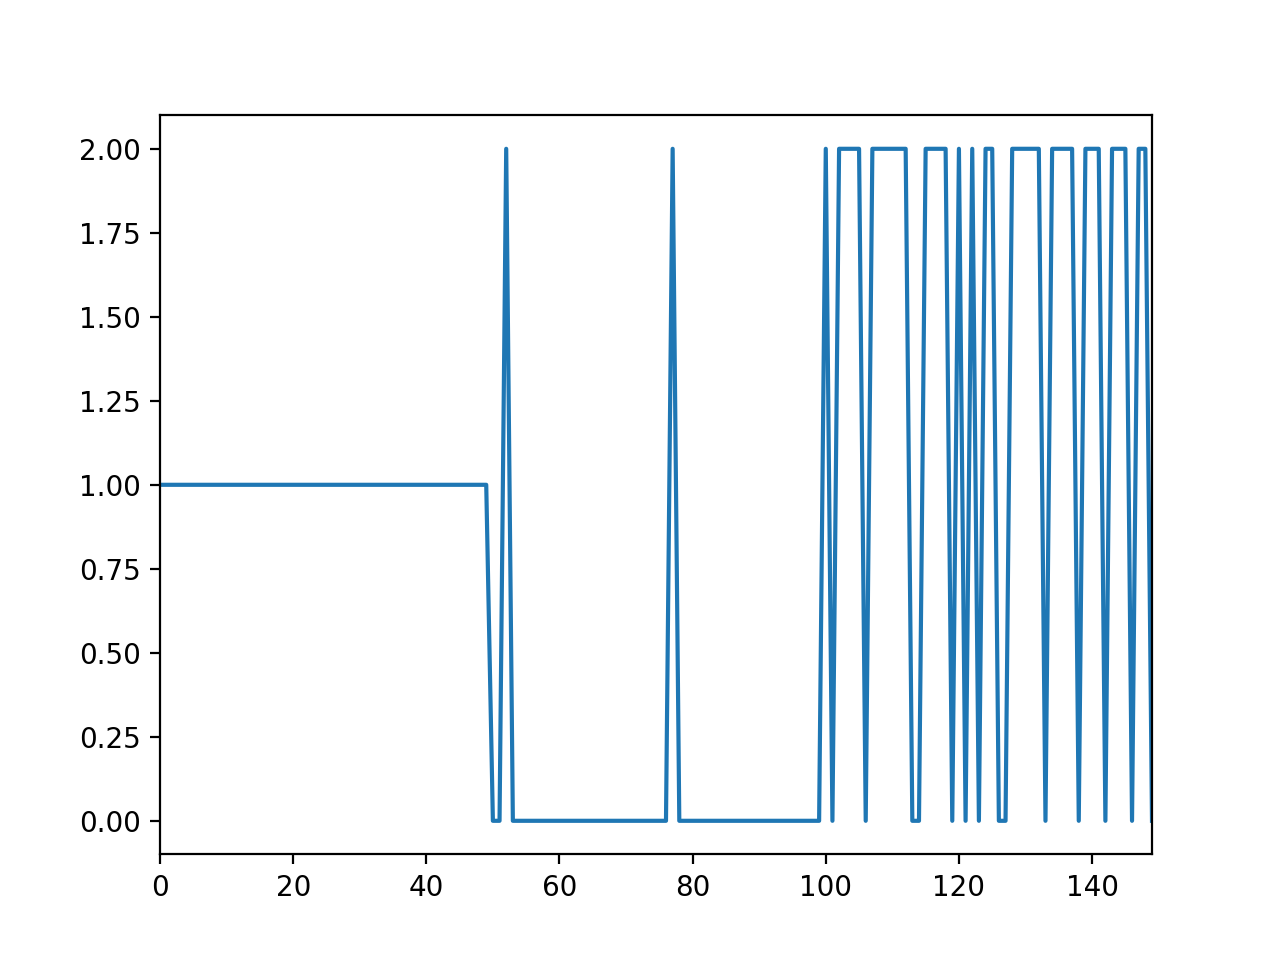

In [67]:
df['cluster'].

## KMeans

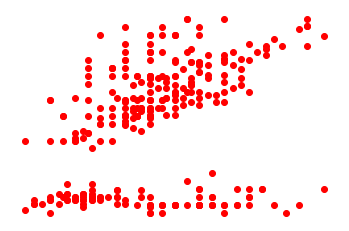

In [51]:
X_plot = preprocessing.MinMaxScaler().fit_transform(X)
#colours = 'rbg'
for i in range(dataframe.shape[0]):
    plt.scatter([X_plot[i, 0], X_plot[i, 1]], [X_plot[i, 2], X_plot[i, 3]], c = 'r')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Agglomerative

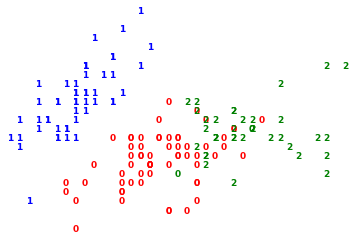

In [110]:
X_plot = preprocessing.MinMaxScaler().fit_transform(X)
colours = 'rbg'
for i in range(dataframe.shape[0]):
    plt.text(X_plot[i, 0], X_plot[i, 1], str(clustering.labels_[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 9}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Original

In [117]:
x = df.drop('cluster', axis = 1)
y_clustered_kmean = df['cluster']
y_original = iris.target

In [123]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'cluster'],
      dtype='object')

In [127]:
test = df.drop(['sepal length (cm)', 'sepal width (cm)', 'cluster'], axis = 1)

In [125]:
print(x.shape, y_clustered.shape, y_original.shape)
print(test.shape)

(600,) (150,) (150,)
(150, 3)
